In [1]:
from tensorflow.keras.layers import *
import tensorflow as tf

import matplotlib.pyplot as plt

tf.random.set_seed(0)

In [2]:
# load data

classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus',
           'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'cra',
           'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom',
           'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
           'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail',
           'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
           'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

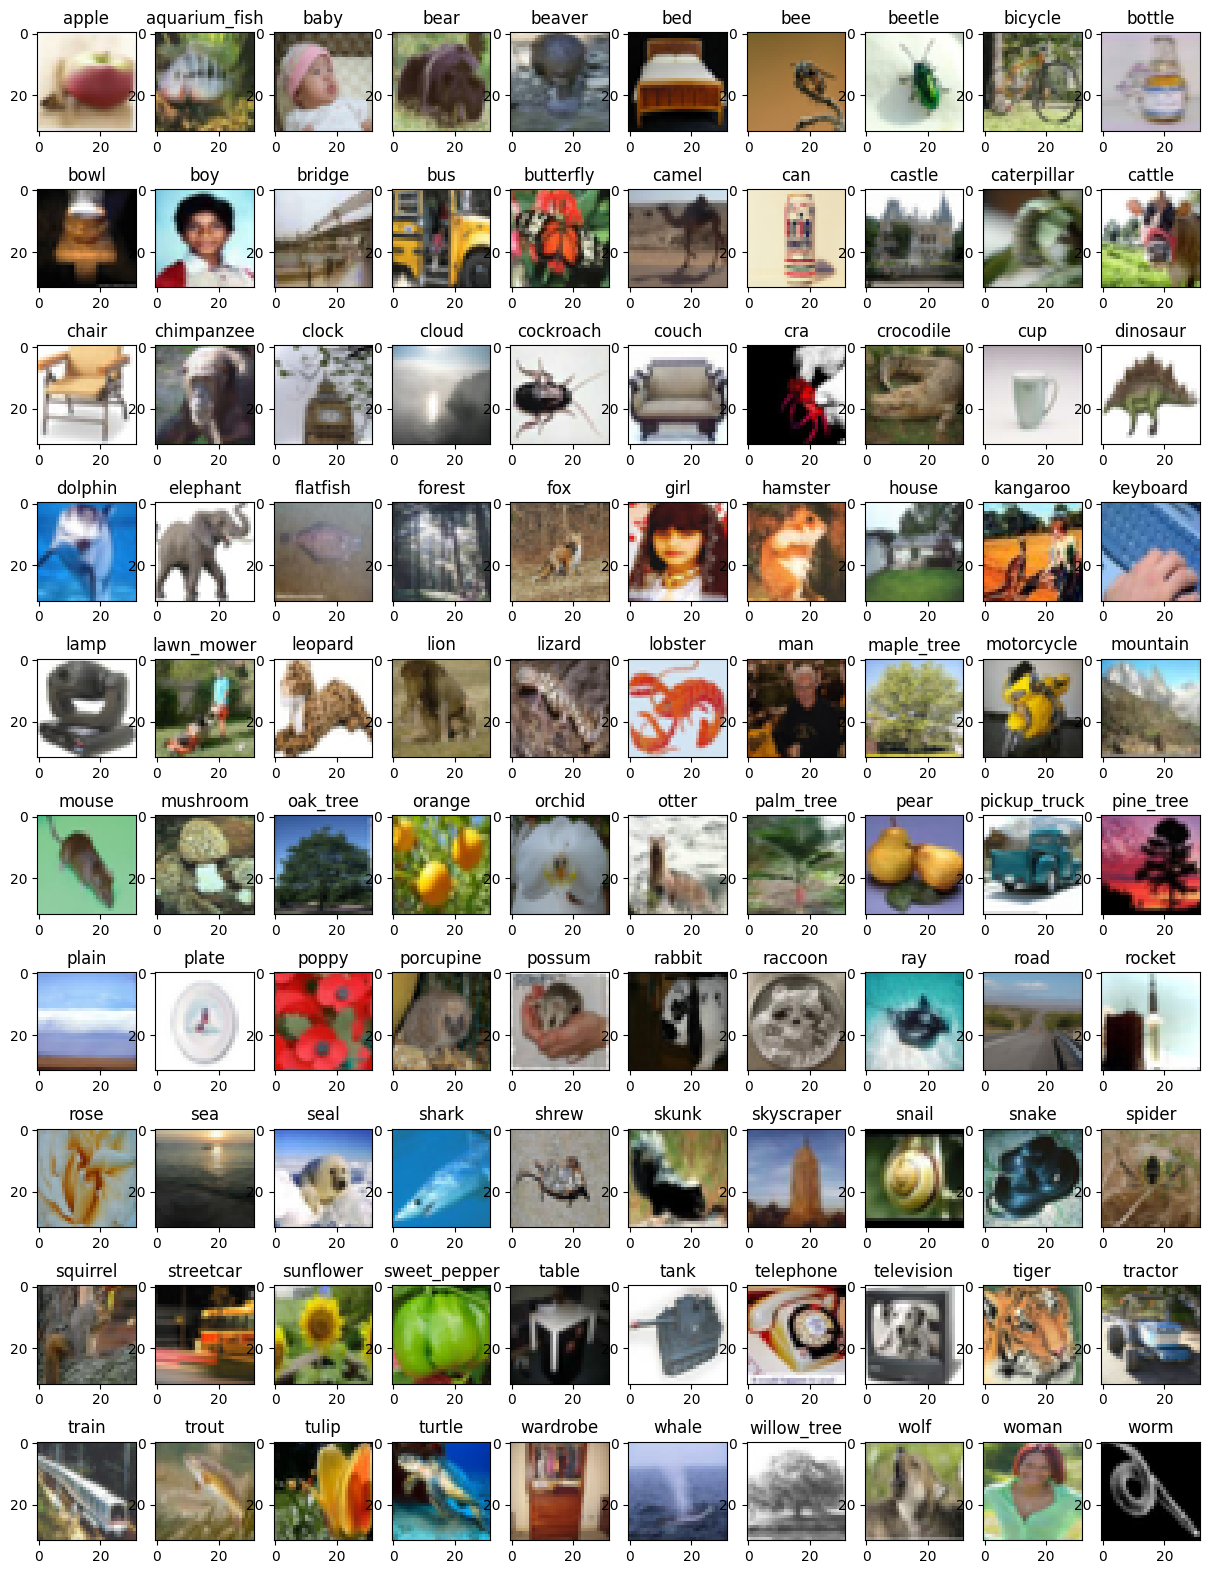

In [4]:
# sample labels

plt.figure(figsize=(15,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[y_train[:,0]==i][0], cmap='gray')
    plt.title(classes[i])
plt.show()

In [5]:
# data processing

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

num_classes = 100
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# build model

model = tf.keras.Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

In [8]:
# compile and train

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

Epoch 1/10
704/704 [==============================] - 152s 205ms/step - loss: 3.8022 - accuracy: 0.1611 - val_loss: 2.9515 - val_accuracy: 0.2830
Epoch 2/10
704/704 [==============================] - 176s 249ms/step - loss: 2.6200 - accuracy: 0.3368 - val_loss: 2.4080 - val_accuracy: 0.3846
Epoch 3/10
704/704 [==============================] - 175s 249ms/step - loss: 2.1033 - accuracy: 0.4430 - val_loss: 2.1008 - val_accuracy: 0.4426
Epoch 4/10
704/704 [==============================] - 175s 249ms/step - loss: 1.7588 - accuracy: 0.5170 - val_loss: 2.0445 - val_accuracy: 0.4712
Epoch 5/10
704/704 [==============================] - 395s 562ms/step - loss: 1.4621 - accuracy: 0.5898 - val_loss: 1.8851 - val_accuracy: 0.5076
Epoch 6/10
704/704 [==============================] - 176s 250ms/step - loss: 1.1840 - accuracy: 0.6587 - val_loss: 1.7557 - val_accuracy: 0.5342
Epoch 7/10
704/704 [==============================] - 176s 250ms/step - loss: 0.9399 - accuracy: 0.7228 - val_loss: 2.0007 -

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 17s 49ms/step - loss: 2.0530 - accuracy: 0.5445


[2.0529732704162598, 0.5444999933242798]

In [10]:
model.save('models/cifar100.h5')